# Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import seaborn as sns 

import my_functions as mybib # my functions 

# change the color palette for seaborn functions
sns.set_theme(palette = "crest")


# imported csv file and transform to dataframe
df = pd.read_csv('marketing_customer_analysis.csv')
display(df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [26]:
# df["Income"] = df["Income"].replace(0, df[df["Income"] != 0]["Income"].median())

# display(df)

In [27]:
import cleaning as cl 

cl.columnCleaning(df)

categorical_col= df.select_dtypes(include=[object])

display(categorical_col)

numerical_data = df.select_dtypes(include=[np.number])

display(numerical_data)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,customer_lifetime_value,income,monthly_premium_costs,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns 

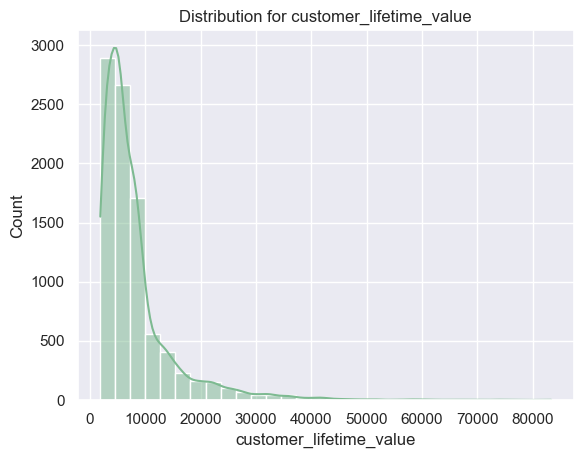

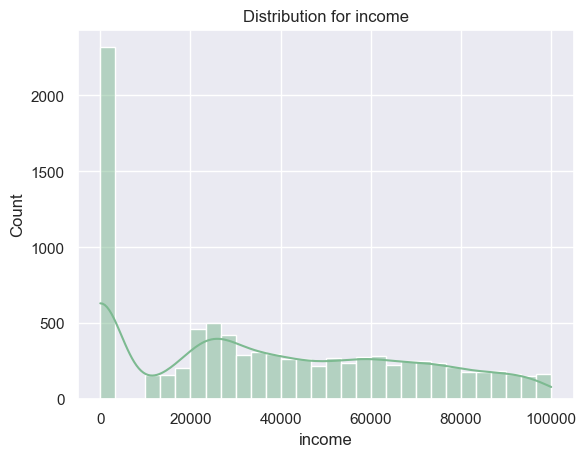

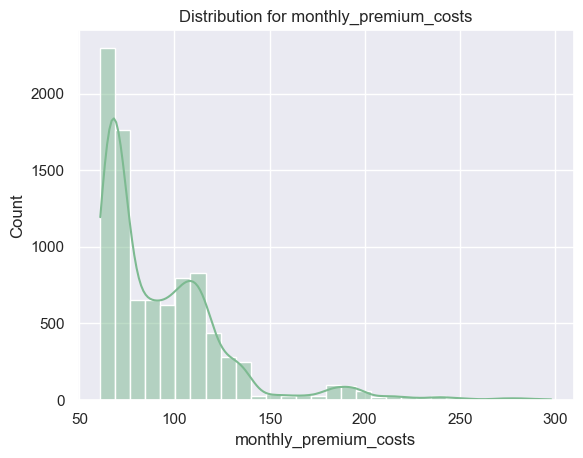

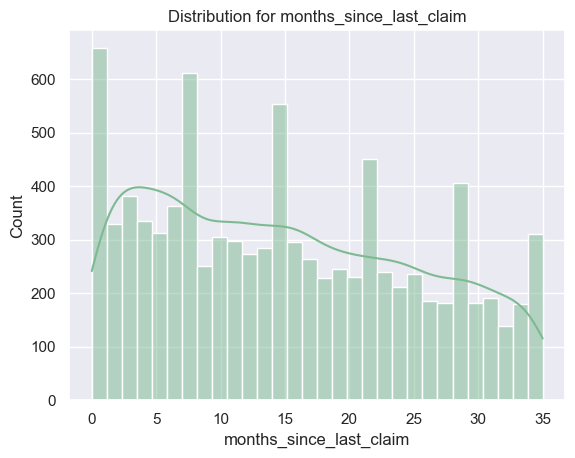

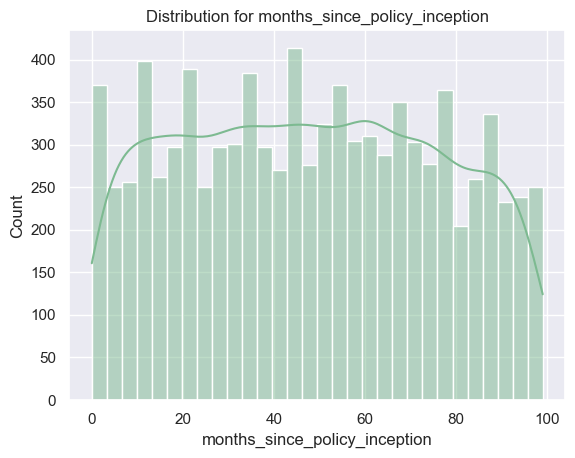

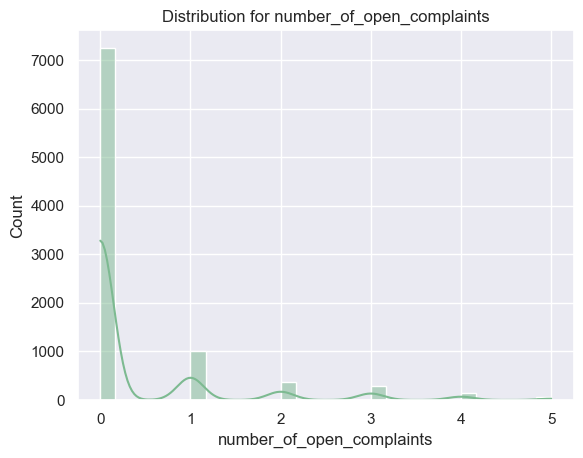

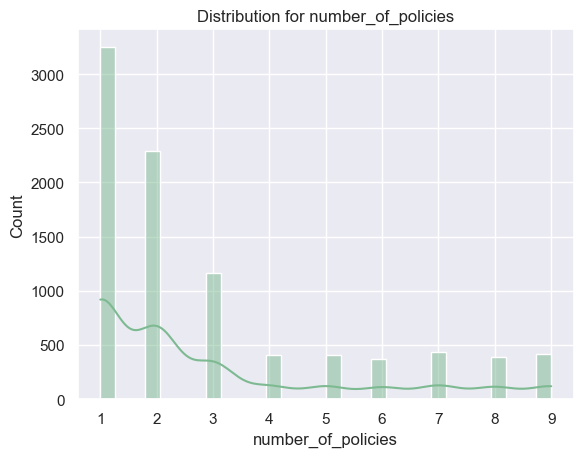

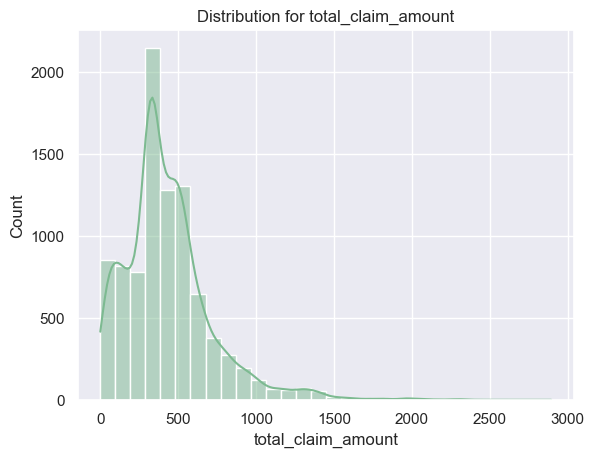

In [29]:
# creating histograms for all columns by using seaborn function
for col in numerical_data:
    headertext = 'Distribution for '
    sns.histplot(numerical_data[col], bins=30, kde=True).set(title= headertext + col)
    plt.show()

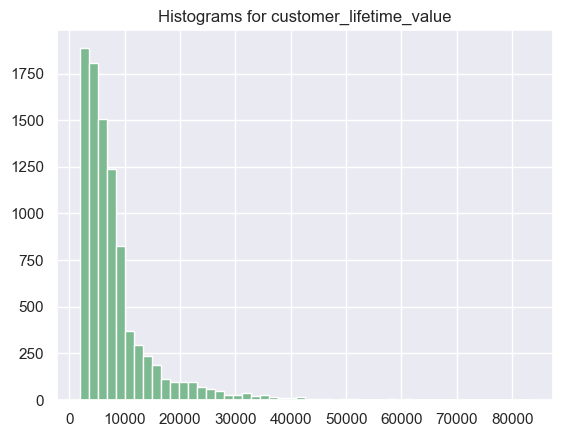

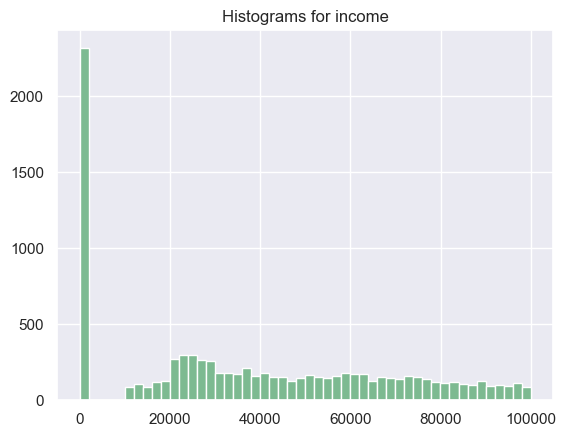

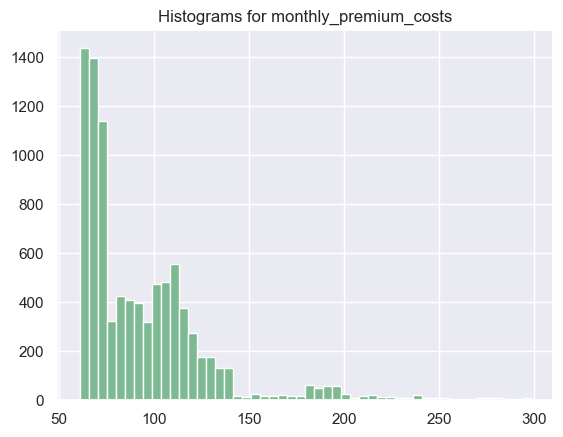

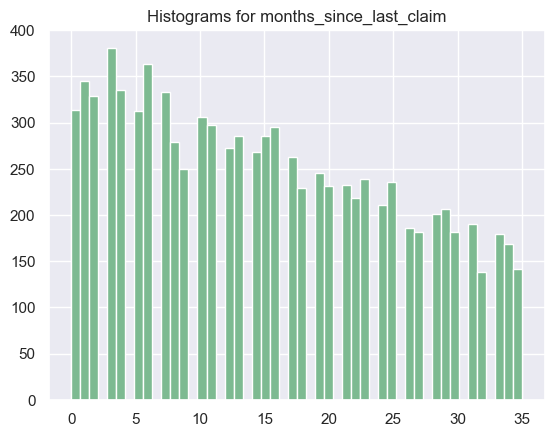

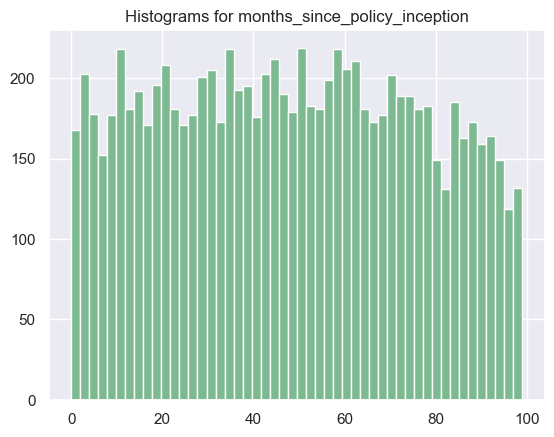

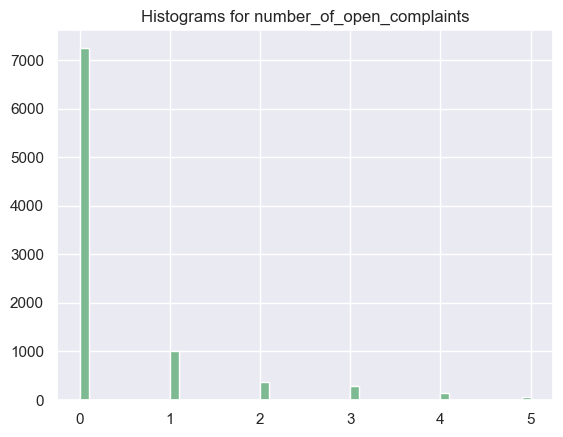

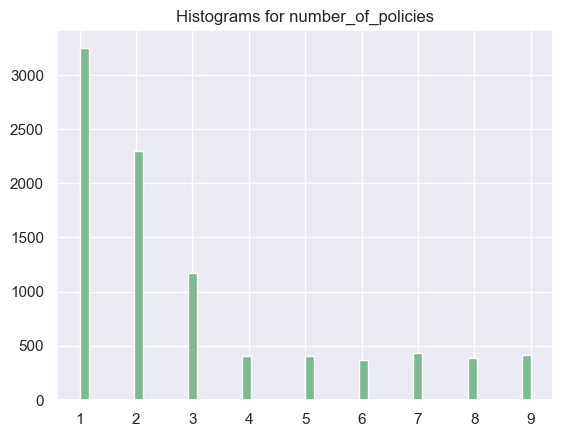

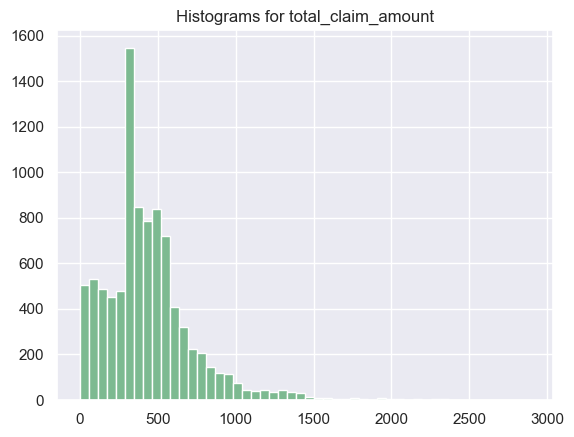

In [30]:


# creating histograms for all columns by using matplotlib function    
for col in numerical_data:
    plt.hist(numerical_data[col], bins =50)
    headertext = 'Histograms for '
    plt.title(headertext + col)
    plt.show()



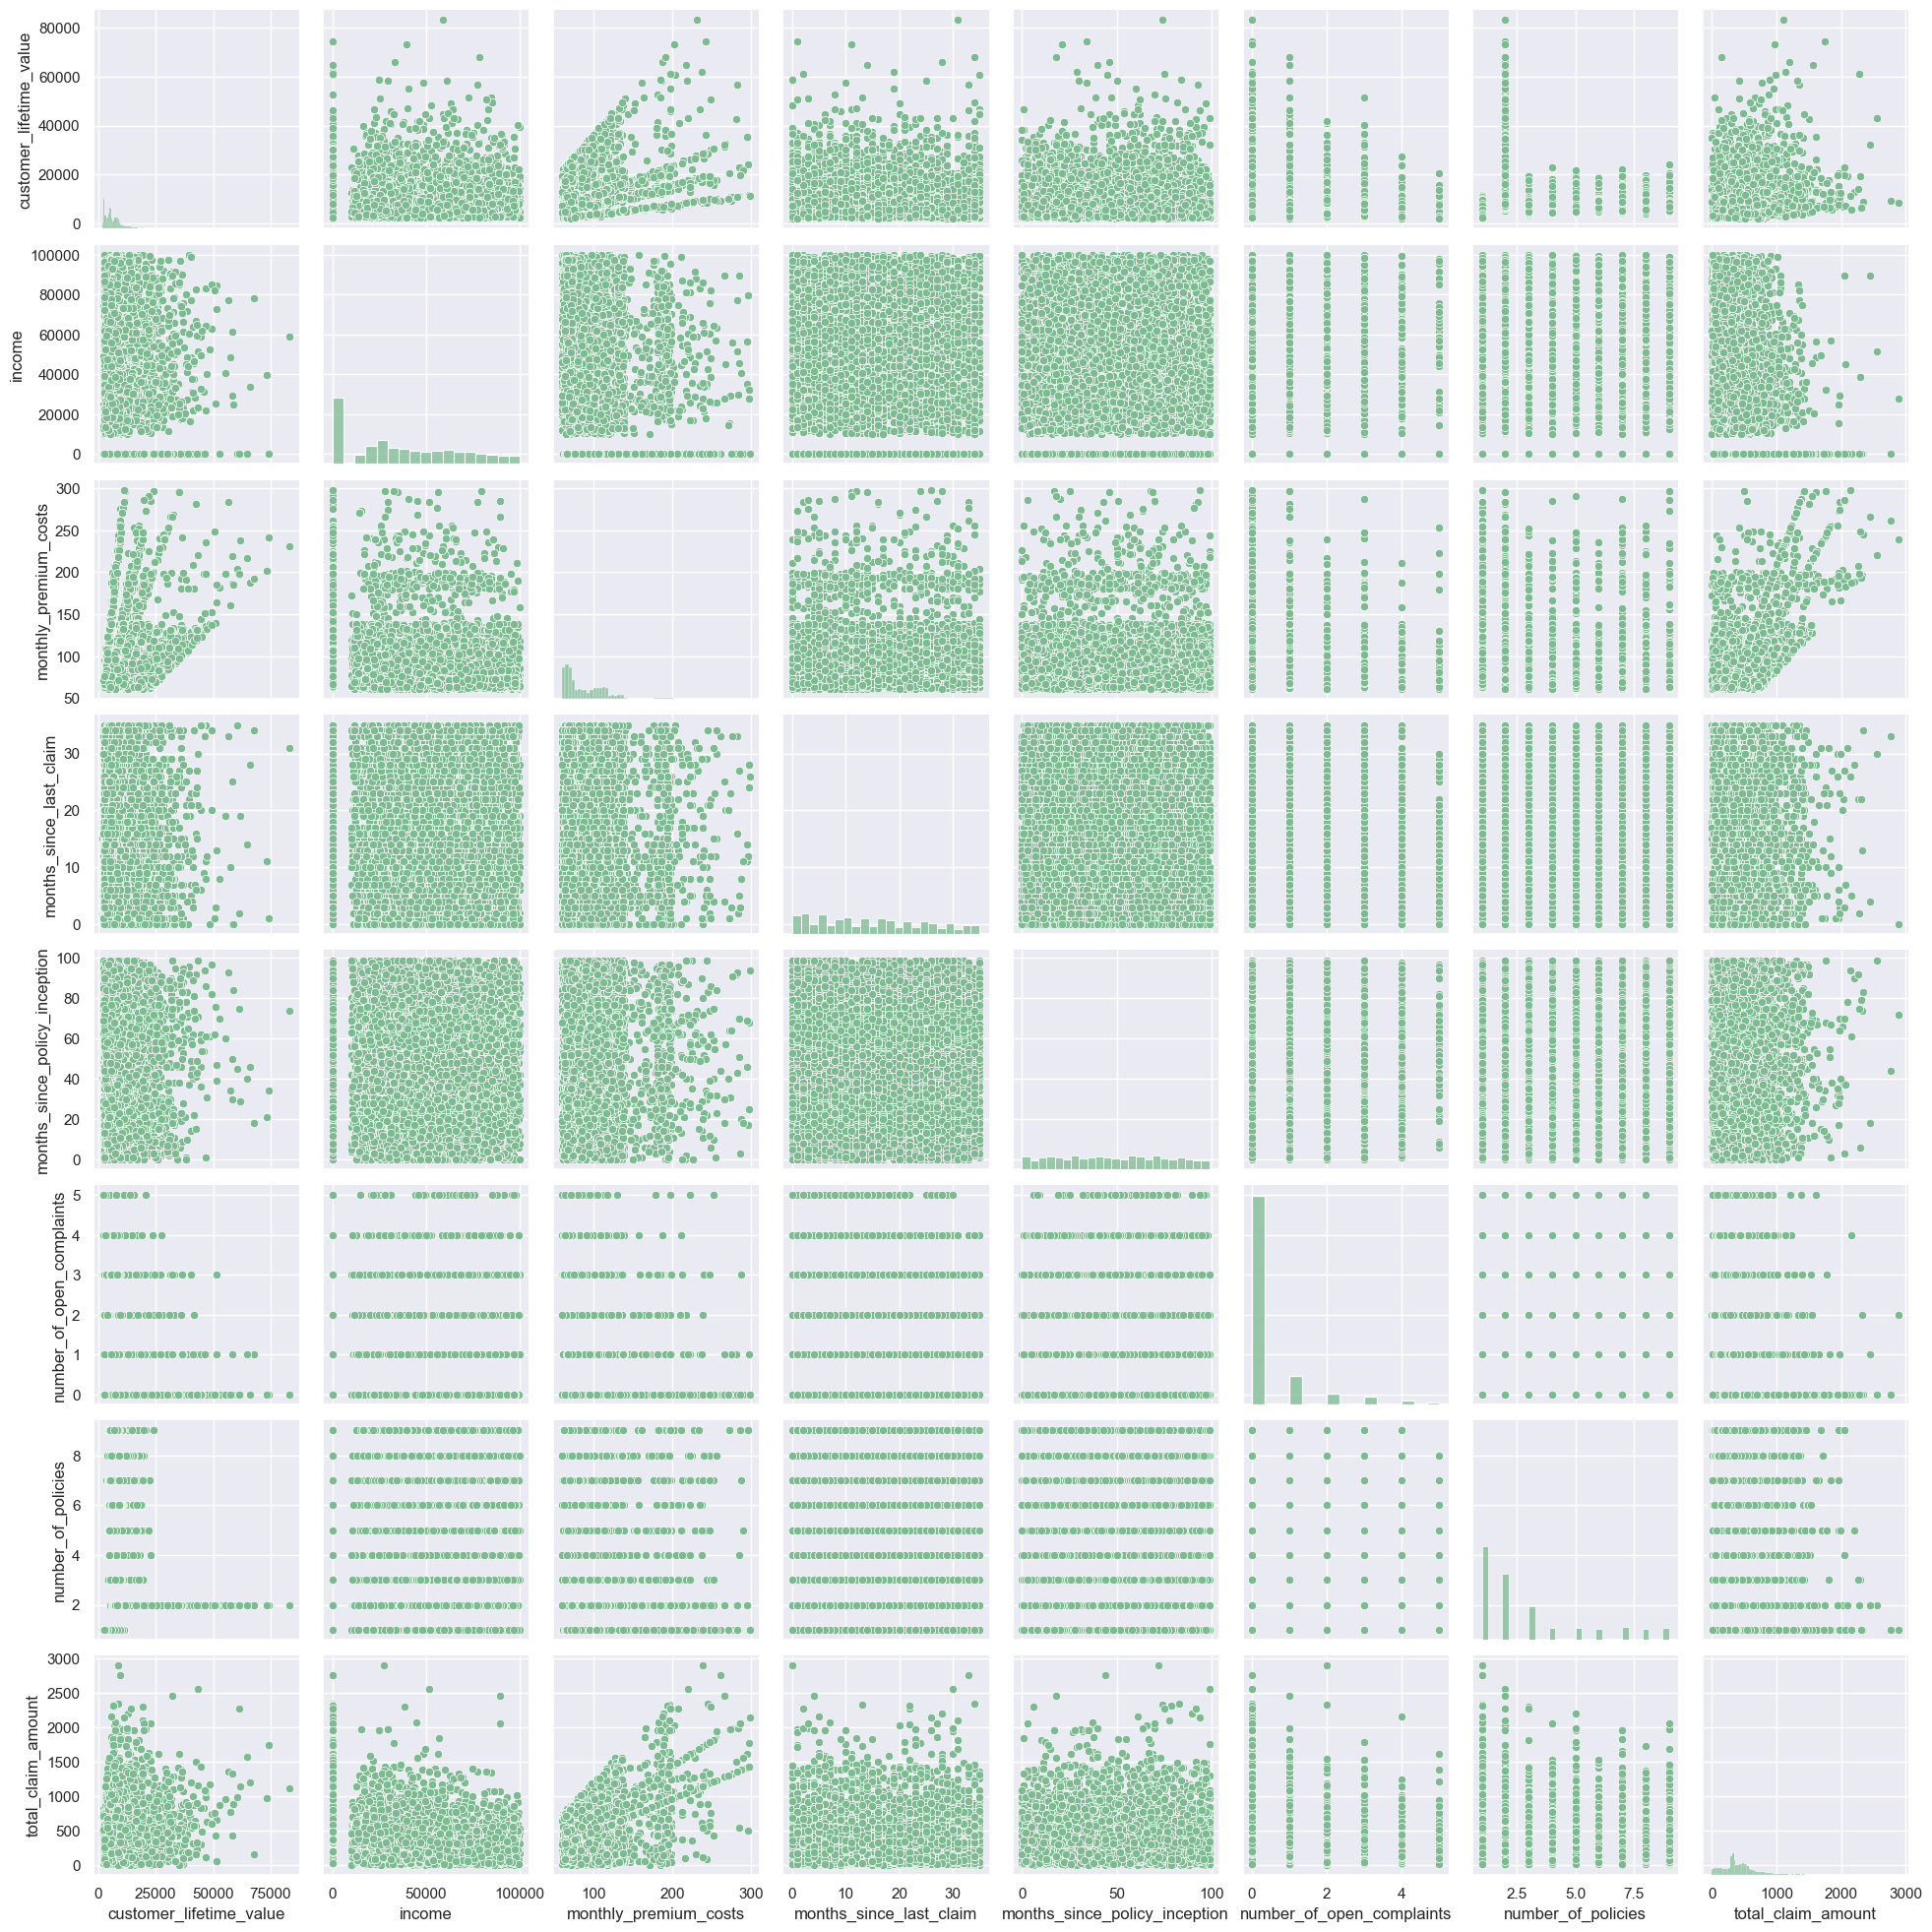

In [31]:
sns.pairplot(numerical_data)

In [32]:
correlations_matrix = numerical_data.corr()
correlations_matrix = correlations_matrix.round(2)
correlations_matrix

,customer_lifetime_value,income,monthly_premium_costs,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_costs,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


<Axes: >

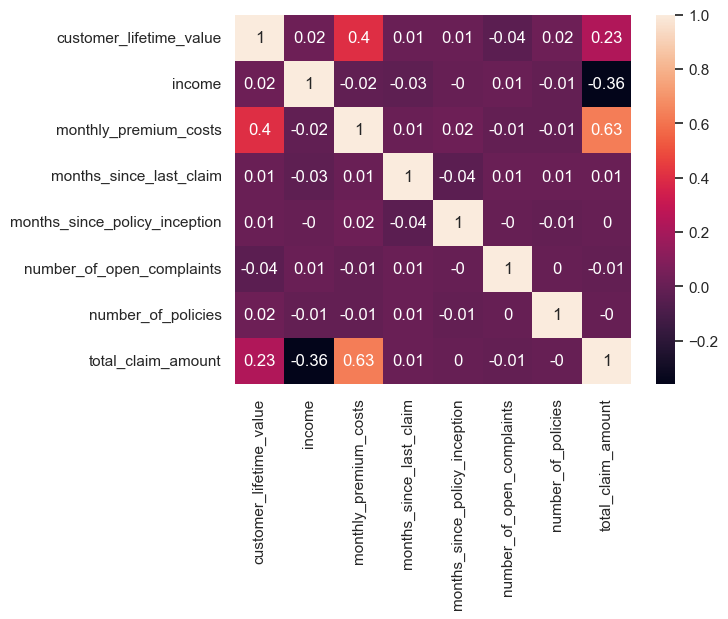

In [33]:
sns.heatmap(correlations_matrix, annot=True)

### End of lab Customer Analysis Round 4

# Lab | Customer Analysis Round 5 

Splitting data into cat and num 

In [34]:
y = df['customer_lifetime_value']
X = df.drop(['customer_lifetime_value'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)



In [35]:
display(X_num)
display(X_num.describe().T)

,income,monthly_premium_costs,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,198.234764
9130,21604,79,14,28,0,1,379.200000
9131,0,85,9,37,3,2,790.784983
9132,21941,96,34,3,0,3,691.200000


,count,mean,std,min,25%,50%,75%,max
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_costs,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


Normalizing - MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


,income,monthly_premium_costs,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


<class 'pandas.core.frame.DataFrame'>


In [37]:
display(X_normalized)
display(X_normalized.describe().T)

,income,monthly_premium_costs,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...
9129,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876


,count,mean,std,min,25%,50%,75%,max
income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
monthly_premium_costs,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0
total_claim_amount,9134.0,0.150006,0.100410,0.0,0.094071,0.132675,0.189212,1.0


# Lab | Customer Analysis Round 6 

In [38]:
# df
# X_cat.head()

# from sklearn.preprocessing import OneHotEncoder
# categorical_columns = X_cat.columns
# print(categorical_columns )

# encoder = OneHotEncoder(drop='first').fit(X_cat)
# # print(encoder.categories_)
# encoded = encoder.transform(X_cat).toarray()
# print(encoded)

# # columns_encoded = encoder.get_feature_names(categorical_columns)
# df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names(categorical_columns))
# # onehot_encoded = pd.DataFrame(encoded,columns=['Female', 'Male','U'])
# # onehot_encoded = pd.DataFrame(encoded,columns=['Male', 'U'])
# # onehot_encoded.head(20)

In [39]:
column_drop = ['customer', 'effective_to_date']

X_cat = X_cat.drop(column_drop, axis=1)
X_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [40]:
# used function from lilit https://github.com/lilitrdavidyan
#TODO: create own function


          

In [41]:
final_X = pd.concat([X_normalized ,encoded_X_cat], axis=1)

final_X

,income,monthly_premium_costs,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train


y_predict = mybib.run_and_test_linear_model(X_train, X_test, y_train, y_test)
print(y_predict)

train r2 score: 0.16352886208236284 -- test r2 score: 0.14515146799836454
train MSE: 38578472.778293416 -- test MSE: 44055598.302129805
train RMSE: 6211.157120721824 -- test RMSE: 6637.439137357856
Model: linear, train MAE: 3874.5715305936164 -- test MAE: 4027.4897029173712
[ 9098.85464724  5677.22895169  7265.92607167 ... 10270.07592712
  5257.2854671   9172.38787736]
